# Assignment-6

# 1.Support Vector Machine

# a.75% of data as training set

confusion matrix of the model
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
accuracy of the model with 75% as training set =  97.36842105263158 %


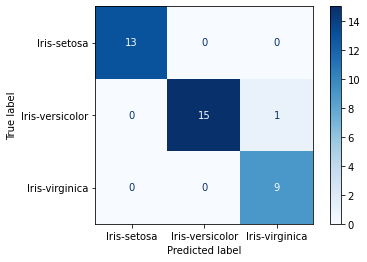

In [1]:
#import the required libraries
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# 1.import the data set
attributes = ["sepal_length","sepal_width","petal_length","petal_width","species"]
data = pd.read_csv('IRIS.data', names = attributes)
data.columns = attributes 
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 2.split the dataset(75% of data into trainingset)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,random_state =0)

# 3.train the svm
svm_classifier= SVC(kernel = 'linear')
svm_classifier.fit(X_train,y_train)

# 4.testing the model
y_predictions = svm_classifier.predict(X_test)

# 5. performance of model
confusionmatrix = confusion_matrix(y_test, y_predictions)
print("confusion matrix of the model\n",confusionmatrix)

# 6. accuracy
accuracy=accuracy_score(y_test, y_predictions)
print("accuracy of the model with 75% as training set = ",accuracy*100,"%")
plot_confusion_matrix(svm_classifier, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# b.80% of data as training set

confusion matrix of the model
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
accuracy of the model with 75% as training set =  97.36842105263158 %


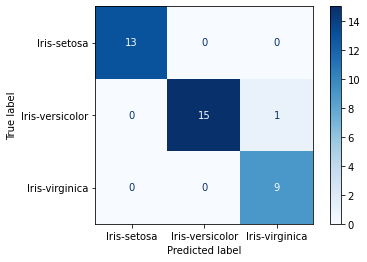

In [2]:
#import the required libraries
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# 1.import the data set
attributes = ["sepal_length","sepal_width","petal_length","petal_width","species"]
data = pd.read_csv('IRIS.data', names = attributes)
data.columns = attributes 
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 2.split the dataset(75% of data into trainingset)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,random_state =0)

# 3.train the svm
svm_classifier= SVC(kernel = 'linear')
svm_classifier.fit(X_train,y_train)

# 4.testing the model
y_predictions = svm_classifier.predict(X_test)

# 5. performance of model
confusionmatrix = confusion_matrix(y_test, y_predictions)
print("confusion matrix of the model\n",confusionmatrix)

# 6. accuracy
accuracy=accuracy_score(y_test, y_predictions)
print("accuracy of the model with 75% as training set = ",accuracy*100,"%")
plot_confusion_matrix(svm_classifier, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# 2.PCA &LDA

In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1.import the dataset
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv('IRIS.data', names = attributes) # represents index for columns
data.columns = attributes 
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


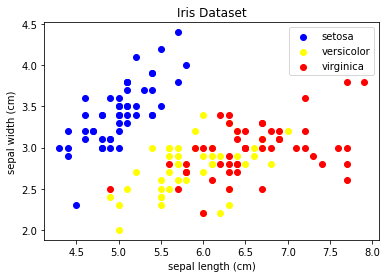

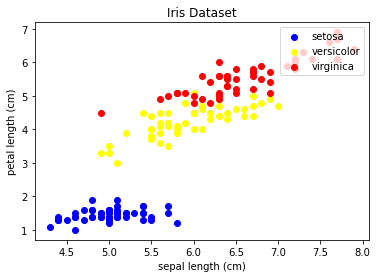

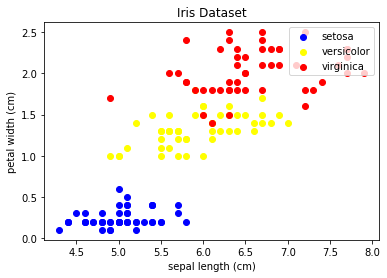

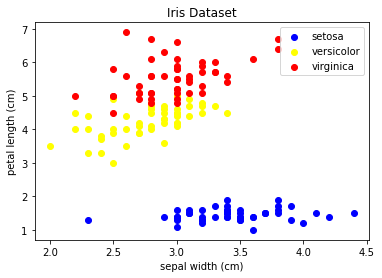

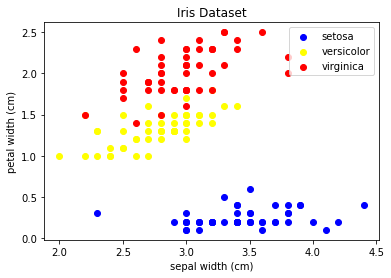

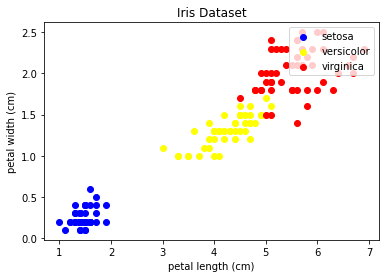

In [4]:
# 2.Visualize the Dataset

irisdataset = load_iris()
def irisdataset_plots(a,b):
    samples = len(irisdataset.target)
    for i in set(irisdataset.target):
        x = [irisdataset.data[j,a] for j in range(samples) if irisdataset.target[j]==i]
        y = [irisdataset.data[j,b] for j in range(samples) if irisdataset.target[j]==i]
        plt.scatter(x,y,color=['blue','yellow','red'][i],label=irisdataset.target_names[i])
    plt.xlabel(irisdataset.feature_names[a])
    plt.ylabel(irisdataset.feature_names[b])
    plt.title('Iris Dataset')
    plt.legend(irisdataset.target_names,loc='upper right')
    plt.show()
features = len(irisdataset.feature_names)
pairs = [(j, k) for j in range(features) for k in range(j+1,features)]
for (a,b) in pairs:
    irisdataset_plots(a,b)

In [5]:
# 3.Normalize the dataset
norm = data.drop('species', axis='columns')
X=data['species']
norm = norm.apply(lambda x:(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
print(norm)

     sepal_length  sepal_width  petal_length  petal_width
0        0.222222     0.625000      0.067797     0.041667
1        0.166667     0.416667      0.067797     0.041667
2        0.111111     0.500000      0.050847     0.041667
3        0.083333     0.458333      0.084746     0.041667
4        0.194444     0.666667      0.067797     0.041667
..            ...          ...           ...          ...
145      0.666667     0.416667      0.711864     0.916667
146      0.555556     0.208333      0.677966     0.750000
147      0.611111     0.416667      0.711864     0.791667
148      0.527778     0.583333      0.745763     0.916667
149      0.444444     0.416667      0.694915     0.708333

[150 rows x 4 columns]


In [6]:
# 4.Mean Matrix
norm=norm.to_numpy()
mean=norm.mean(axis=0) 
print('mean vector=',mean)
qmean = np.reshape(mean, (4, 1))
print('mean vector in 4*1 format=')
print(qmean)

mean vector= [0.4287037  0.43916667 0.46757062 0.45777778]
mean vector in 4*1 format=
[[0.4287037 ]
 [0.43916667]
 [0.46757062]
 [0.45777778]]


In [7]:
# Covariance Matrix
n=150
covariance_matrix = (norm- mean).T.dot((norm - mean))/(n-1)
print('Covariance matrix =\n%s' %covariance_matrix)

Covariance matrix =
[[ 0.05290845 -0.00454496  0.05996621  0.05982683]
 [-0.00454496  0.03263959 -0.02271983 -0.02048285]
 [ 0.05996621 -0.02271983  0.08943348  0.09155279]
 [ 0.05982683 -0.02048285  0.09155279  0.1011136 ]]


In [8]:
# 5.Eigen Decomposition
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)
print('eigenvalues=\n',eigen_values)
print('\neigenvectors= \n',eigen_vectors)

eigenvalues=
 [0.23231168 0.03239279 0.00963728 0.00175337]

eigenvectors= 
 [[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]


In [9]:
indices = eigen_values.argsort()[::-1]
eigenvalues = eigen_values[indices]
eigenvectors = eigen_vectors[:,indices]
print ('sorted eigenvalues =\n', eigenvalues)
print ('sorted eigenvectors=\n', eigenvectors)

sorted eigenvalues =
 [0.23231168 0.03239279 0.00963728 0.00175337]
sorted eigenvectors=
 [[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]


In [10]:
#7. Projecting to new feature space
p=np.dot(covariance_matrix,eigenvectors[:,0])/eigenvalues[0]
q=p.reshape(4,1)
r=np.dot(covariance_matrix,eigenvectors[:,1])/eigenvalues[1]
s=r.reshape(4,1)
projection_matrix=np.hstack((q,s))
print('projection_matrix=\n',projection_matrix)

projection_matrix=
 [[ 0.4252893  -0.42100611]
 [-0.14612219 -0.90470509]
 [ 0.61610511  0.06432645]
 [ 0.64667752  0.01116485]]


In [11]:
Y1 = norm.dot(projection_matrix)
Y = pd.DataFrame(Y1 ,columns = ['Principal component 1', 'Principal component 2']) 
print('New feature space is\n',Y)

New feature space is
      Principal component 1  Principal component 2
0                 0.071897              -0.654171
1                 0.078712              -0.442302
2                 0.032466              -0.495395
3                 0.047625              -0.443824
4                 0.053995              -0.680173
..                     ...                    ...
145               1.254013              -0.601605
146               1.108536              -0.370388
147               1.149551              -0.579611
148               1.191476              -0.691736
149               1.014337              -0.511464

[150 rows x 2 columns]


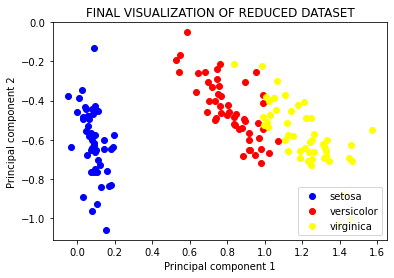

In [12]:
# 8.Final Visualization
plt.scatter(Y['Principal component 1'][:50], Y['Principal component 2'][:50], color='blue')
plt.scatter(Y['Principal component 1'][50:100], Y['Principal component 2'][50:100], color='red')
plt.scatter(Y['Principal component 1'][100:], Y['Principal component 2'][100:], color='yellow');
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('FINAL VISUALIZATION OF REDUCED DATASET')
plt.legend(irisdataset.target_names, loc='lower right')
plt.show()